In [36]:
%reload_ext cypher
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [37]:
LA = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Ecuador', 'El Salvador', 'French Guiana', 'Grenada', 'Guatemala', 'Guiana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Paraguay', 'Panama', 'Peru', 'Puerto Rico', 'Dominican Republic', 'Surinam', 'Uruguay', 'Venezuela']

In [38]:
films_in_festivals = pd.read_csv("data/films_in_festival.csv", sep="|")
films_with_funding = pd.read_csv("data/films_with_funding.csv", sep="|")
films_with_funding = films_with_funding[['title', 'year', 'grants']]
res = pd.merge(films_in_festivals, films_with_funding, on='title')

## Datos totales

In [40]:
print ('Number of films that received funding: ', len(films_with_funding))
print ('Number of those that participated in festivals: ', len(res))
print ('Number of those that won an award: ', len(res[res.award.notnull()]))

Number of films that received funding:  657
Number of those that participated in festivals:  257
Number of those that won an award:  32


## Datos de Latinoamerica

In [42]:
la_films_with_funding = pd.read_csv("data/films_with_funding.csv", sep="|")
la_films_with_funding = la_films_with_funding[la_films_with_funding.country.isin(LA)]
la_res = res[res.country.isin(LA)]

In [43]:
print ('Number of films that received funding: ', len(la_films_with_funding))
print ('Number of those that participated in festivals: ', len(la_res))
print ('Number of those that won an award: ', len(la_res[la_res.award.notnull()]))

Number of films that received funding:  223
Number of those that participated in festivals:  69
Number of those that won an award:  10


In [48]:
la_res

,title,director,year_x,country,award,section,year_y,grants
0,33,Kiko Goifman,2003.0,Brazil,NaN,NaN,2002,Post-production support
5,Tan de repente,Diego Lerman,2003.0,Argentina,NaN,NaN,2002,Post-production support
6,Dias de Santiago,Josue Mendez,2004.0,Peru,NaN,VPRO Tiger Awards Competition,2003,Post-production support
10,Ana y los otros,Celina Murga,2004.0,Argentina,NaN,NaN,2003,Post-production support
11,Buena Vida Delivery,Leonardo Di Cesare,2004.0,Argentina,NaN,NaN,2003,Post-production support
19,Nina,Heitor Dhalia,2004.0,Brazil,NaN,NaN,2003,Post-production support
23,Kept and Dreamless,Martin Desalvo & Vera Fogwill,2005.0,Argentina,NaN,VPRO Tiger Awards Competition,2004,Post-production support
24,Kept and Dreamless,Martin Desalvo & Vera Fogwill,2005.0,Argentina,NaN,VPRO Tiger Awards Competition,2002,Script and Project Development Support
25,Familia rodante,Pablo Trapero,2005.0,Argentina,NaN,Sturm und Drang,2003,Post-production support
26,Parapalos,Ana Poliak,2005.0,Argentina,NaN,Sturm und Drang,2003,Post-production support


## Distribution per year

In [53]:
df_year = la_films_with_funding.groupby('year', sort=False).agg({'title':'count'})
df_year.columns = ['Number of films that received funding']

df_yearla= la_res.groupby('year_y', sort=False).agg({'title':'count'})
df_yearla.columns = ['Number of films in festival']

df_yearla_award = la_res[la_res.award.notnull()]
df_yearla_award = df_yearla_award.groupby('year_y', sort=False).agg({'title':'count'})
df_yearla_award.columns = ['Number of awarded films']

result = pd.concat([df_year, df_yearla, df_yearla_award], axis=1)
result.sort_index()


,Number of films that received funding,Number of films in festival,Number of awarded films
2002,19,6.0,NaN
2003,19,8.0,1.0
2004,13,6.0,1.0
2005,20,11.0,2.0
2006,14,4.0,NaN
2007,15,6.0,1.0
2008,16,7.0,2.0
2009,14,6.0,1.0
2010,19,5.0,NaN
2011,19,3.0,1.0


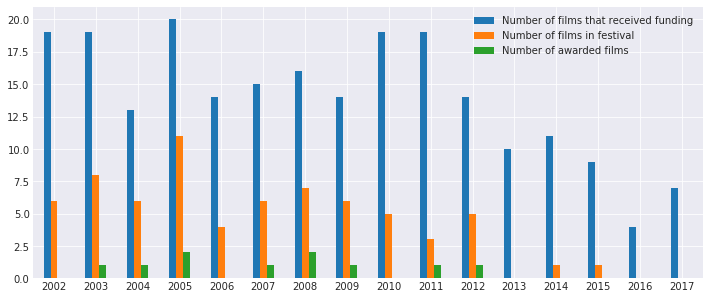

In [54]:
result = result.sort_index()
result.plot(rot = 0, kind='bar', figsize=(12,5))

In [55]:
result  = result.sort_index()
result['Effectiveness'] = round(result['Number of films in festival'] / result['Number of films that received funding'], 2)
result['Efficiency'] = round(result['Number of awarded films'] / result['Number of films in festival'], 2)


In [56]:
result

,Number of films that received funding,Number of films in festival,Number of awarded films,Effectiveness,Efficiency
2002,19,6.0,NaN,0.32,NaN
2003,19,8.0,1.0,0.42,0.12
2004,13,6.0,1.0,0.46,0.17
2005,20,11.0,2.0,0.55,0.18
2006,14,4.0,NaN,0.29,NaN
2007,15,6.0,1.0,0.40,0.17
2008,16,7.0,2.0,0.44,0.29
2009,14,6.0,1.0,0.43,0.17
2010,19,5.0,NaN,0.26,NaN
2011,19,3.0,1.0,0.16,0.33
